we will also use lasso and ridge regression model. we will also use support vector regression models
    
Regression - algorithm is used when x causes y. generally represented on x,y axis. Linear regression model draws a best fit line that passes through given data. this is done with a linear equation y = A1 + B1x but how do we find this best fit line?
    
best fit line can be formed by minimizing least squared error. best fit line is = sum of squares of distance between actual y and predicted y[on line] is min.repeat this for all possible lines that can be drawing using that training data.
and come up with a best fit regression line whose sum of squares is minimum.
    
residuals = actual y - fitted y on the line
sum of residuals should be minimal.
    
y = a + bx [a is intercept and b is slope of the line]
simple regression = with one feature [x axis] = has 1 independent input variable [x]
y = a + bx
multiple regression = with multiple features [n-d axis] = has multiple independent input vrbls[x1,x2,...]
y = a + b1x1 + b2x2 + ...
    
how to measure how good our regression is?
r^2 = ess / tss = explained sum of squares / total sum of squares.
ie, ess = variance of fitted values, tss = variance of actual values
    
by r-square we are seeing how well our regression model represents the underlying data.
higher r-square = better the quality of regression (upper bound 100%)
    
other types of regression => ridge, lasso, elasticnet, and svr
    

in this project we are going to find vehicle price.
this is regression problem

In [1]:
import pandas as pd
import numpy as np

In [2]:
#even though file is in text file we can read it in csv
auto_data =  pd.read_csv('auto.txt')
auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# # clean the data

#Lets remove unwanted symbols from the data.
we are going to give this data to machine learning algorithms
all these algorithms are written with maths - probability stats, cal..
so algorithum will understand only numbers.
a. so we should remove symbols
b. so we should remove nan and empty cells
c. so we should remove txt we have convert text to numbers
d. we should remove duplicatees columns
e.we should remove unwanted columns

In [3]:
auto_data = auto_data.replace('?',np.nan)
auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
auto_data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [5]:
# as you can see price columns is missing which is very important for prediction.
auto_data.describe(include='all') #see last column..but it has many nan values

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164,205,205,205,203,205,205,205,205.000000,...,205.000000,205,201,201,205.000000,203,203,205.000000,205.000000,201
unique,NaN,51,22,2,2,2,5,3,2,NaN,...,NaN,8,38,36,NaN,59,23,NaN,NaN,186
top,NaN,161,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,7898
freq,NaN,11,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,2
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [6]:
auto_data['price'].describe()
#if you see the data type of price is object type..
# object cant be summarized with numerical statistics.

count      201
unique     186
top       7898
freq         2
Name: price, dtype: object

In [7]:
# we have to convert this column to float type
auto_data['price'] = pd.to_numeric(auto_data['price'], errors='coerce') 
#coerce means force ignore err
auto_data['price'].describe() 
#now type is converted to float

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

In [8]:
# there are some columns which plays no role in predicting the prices..one such column nrmlzd ls..drop those columns
auto_data = auto_data.drop('normalized-losses', axis=1)
auto_data.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
# describe data again to see if we need to do any thing extra for preparing data for linear regression
auto_data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220,13207.129353
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [10]:
auto_data['price'].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

In [11]:
# # see if any other columns are objects..convert them to number types
auto_data['horsepower'].describe() 

count     203
unique     59
top        68
freq       19
Name: horsepower, dtype: object

In [12]:
auto_data['horsepower'] = pd.to_numeric(auto_data['horsepower'], errors='coerce')#cnvrt to float
auto_data['horsepower'].describe() 

count    203.000000
mean     104.256158
std       39.714369
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

In [13]:
auto_data['num-of-cylinders'].describe() 

count      205
unique       7
top       four
freq       159
Name: num-of-cylinders, dtype: object

In [14]:
auto_data['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [15]:
cylinders_dict = {
    'two':2,
    'three':3,
    'four':4,
    'five':5,
    'six':6,
    'eight':8,
    'twelve':12
}
auto_data['num-of-cylinders'].replace(cylinders_dict, inplace = True)
auto_data.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500,18,22,17450.0


In [16]:
'''
    or any given column if the values are limeted. then it is called categoricals
    changing categorical values make, num-of-doors, body-style etc..using one-hot representation
'''
auto_data = pd.get_dummies(auto_data, columns=[
    'make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels',
    'engine-location','engine-type','fuel-system'
])
auto_data.head()

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,1,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [17]:
# lets clean up our data
#dropna() is a predefined function of pandas which removes null rows.
auto_data = auto_data.dropna()
auto_data.head()

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,1,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [18]:
# lets see if our data set has any null values?
auto_data[auto_data.isnull().any(axis=1)] 
#we have only 0 rows..so good..

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi


In [19]:
from sklearn.model_selection import train_test_split
# lets feed our data to machine learning model
x = auto_data.drop('price', axis=1)

y = auto_data['price']

# split data into 80% for training, 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)

In [20]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [21]:
linear_model.score(x_train, y_train) 
#get the r-square which tells how good is the regression line
# how close the data points to the fitted linear regression line..96% is very high, very close.

0.967922737092433

In [22]:
linear_model.coef_ 
#shows weights of all features in our data sets.

array([-5.80061464e+02,  3.06874682e+02, -1.06499194e+02,  1.52236727e+02,
       -5.05771408e+02,  5.30902624e+00, -4.15988710e+03,  2.82885047e+02,
       -1.75044342e+04, -4.49860407e+03, -1.59555122e+03, -4.82296063e+01,
        2.15673623e+00, -6.79852969e+01,  1.73362582e+02, -3.74284422e+03,
        3.71721668e+03,  6.86565908e+03, -4.12474818e+03, -4.48093478e+03,
       -2.94555422e+02, -4.74283895e+03,  3.47319261e+03, -4.08732786e+02,
        3.02841192e+03,  2.30284405e+03, -4.71448781e+03, -6.67651176e+02,
       -8.40276958e+03, -5.25933085e+03,  1.04713265e+04, -2.91038305e-11,
        8.36042927e+03, -4.81543507e+02, -2.06062392e+03,  6.21153583e+01,
        1.09986569e+03,  6.06615966e+03, -6.06615966e+03, -1.38232301e+03,
        1.38232301e+03,  3.37569880e+03,  3.28229109e+03,  2.99875643e+03,
       -1.00643481e+03, -1.20820627e+03, -3.92414032e+02, -3.91701310e+02,
       -4.99487338e+02, -6.59140532e+02,  1.15862787e+03, -2.46748485e+03,
        2.46748485e+03, -

In [23]:
predictors = x_train.columns #see the weights associcated with perticular feature.
coef = pd.Series(linear_model.coef_, predictors).sort_values()
print(coef) # a+bx [where b is co-efficient of x feature..this prints all features co-effs]

#     -ve coefficients means cars with these features are cheaper.
#     coefficients which are close to 0 has 0 effect on the car price.
#     higher coefficient valued features are deciding factors of car high price.

bore               -17504.434184
make_peugot         -8402.769583
fuel-type_gas       -6066.159660
make_plymouth       -5259.330848
make_isuzu          -4742.838945
                        ...     
fuel-system_idi      6066.159660
fuel-type_diesel     6066.159660
make_bmw             6865.659076
make_saab            8360.429269
make_porsche        10471.326516
Length: 68, dtype: float64


In [24]:
# lets predict using linear regression model
y_predict = linear_model.predict(x_test)

Populating the interactive namespace from numpy and matplotlib


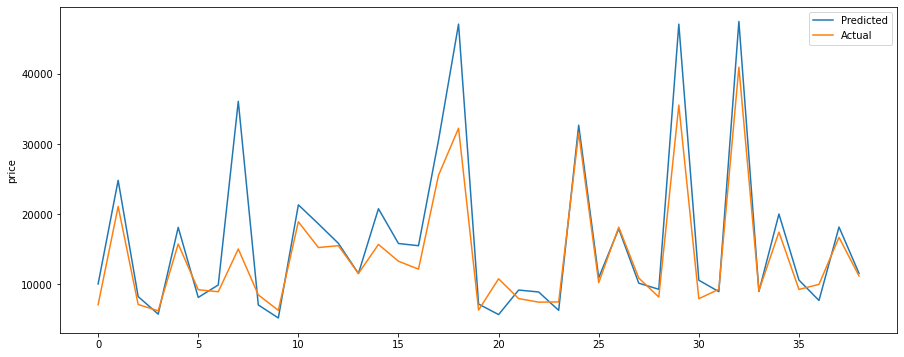

In [25]:
# lets plot the prediction using matplot lib
%pylab inline
pylab.rcParams['figure.figsize'] = (15,6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('price')
plt.legend()
plt.show()

In [26]:
# how well our regression model works on our test data
r_square = linear_model.score(x_test, y_test)
r_square #63% accuracy..though not as close as trained data..but that is expected.

0.6322583416115031

In [27]:
from sklearn.metrics import mean_squared_error

linear_model_mse = mean_squared_error(y_predict, y_test) #predicted y and actual y..
linear_model_mse #its coming out to be 26 millions

26099937.60435494

In [28]:
import math
math.sqrt(linear_model_mse) #standard deviation of residuals
# how much the predicted label differs from actual label
# our predicted prices are 5100$ away from the actual price. [can be -ve or +ve]

5108.809803110206

linear regression main disadvantage is overfitting. where it performs superb in training data, but with real data poor performance. 
this can occur because of several reasons.one reason using co-related features. 
where two features has same meaning and we are using both features as input parameters for training our model.
rather than using co-related features better to use intutive underlying unique features to avoid over-fitting model.
one more solution for over-fitting problem of linear regression algo is using lasso and ridge algorithms and elastic net regression [combination of lasso and ridge].

In [29]:
# implementing lasso and ridge regression models.
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.5, normalize=True) #alpha is regularization parametter to avoid over-fit
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.5, normalize=True)

In [30]:
# now see the r^2 [r square]
lasso_model.score(x_train, y_train) #slightly low compared to linear regression model

0.9651081272527551

In [31]:
# lets print the co-effs of various features of our training sets
coef = pd.Series(lasso_model.coef_, predictors).sort_values()
print(coef) 

#     -ve vlaues has inverse effect on the vehicle price [more -ve less the price]..identify features.
#     you can observe lasso has made many features coefs as 0 there by eleminating many features
#     which has 0 effect on the price, so that over-fit wont occur. probably those are co-related.

bore                    -9092.176284
make_peugot             -6467.778380
make_jaguar             -6193.545297
engine-location_front   -4537.583890
engine-type_ohcv        -4223.273694
                            ...     
engine-type_l            4268.717784
make_mercedes-benz       4728.694733
make_bmw                 6586.645811
make_saab                6762.816668
make_porsche             7787.668286
Length: 68, dtype: float64


In [32]:
# now lets predict the prices for our test data set
y_predict = lasso_model.predict(x_test)

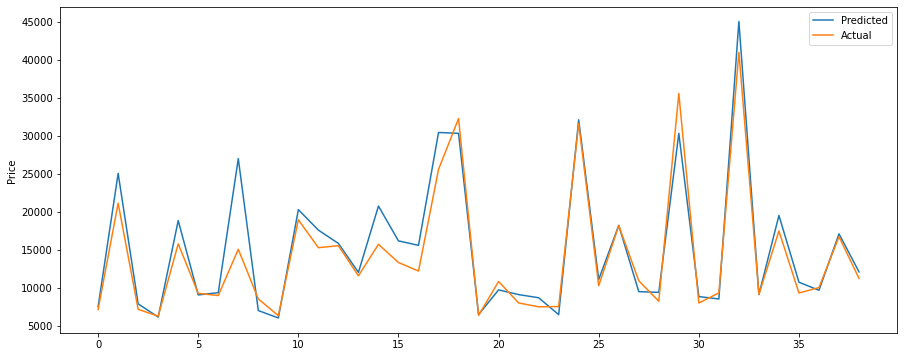

In [33]:
pylab.rcParams['figure.figsize'] = (15,6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')

plt.legend()
plt.show() #plot pic for predicted value vs actual value.observ pic, predicted and actual r vry close
# it looks to be much better fit.

In [34]:
# lets confirm this by calculating r^2 on the test data..
r_square = lasso_model.score(x_test, y_test)
r_square 
#its 88% where as for linear reg model its only 63%

0.8871949534448474

In [35]:
# now lets calculate root mean square error [mse]
lasso_model_mse = mean_squared_error(y_predict, y_test)
math.sqrt(lasso_model_mse) #it was 5100$ for linear regression model..

# go up and change alpha from 0.5 to 5, and then press shift+enter to execute all cells below that
# and observer how the predictions are getting better.
# also observe when we change our hyper parameter alpha, to higher number,
# more features co-effs became 0's which means lasso model has made many features as invalid
# and useless for the model, but still you can observe that r_squqre is getting better and mse
# getting lower number. which is good sign of our model. but tweaking this alpha require much more intution.

2829.518800848226

In [36]:
# Ridge regression algorithm
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.5, normalize = True)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.5, normalize=True)

In [37]:
ridge_model.score(x_train, y_train) #see how well ridge performs on training sets. its 92%

0.9269306078889094

In [38]:
# examine the co-effs of the features in ridge model
coef = pd.Series(ridge_model.coef_, predictors).sort_values()
print(coef)

# observe that high co-ef features are much less compared to linear model and lasso.

engine-location_front    -3919.992407
make_isuzu               -1747.799221
make_peugot              -1393.751458
make_mercury             -1339.684017
make_subaru              -1134.710485
                             ...     
body-style_convertible    2226.995273
make_porsche              3836.566842
engine-location_rear      3919.992407
make_bmw                  5188.333576
make_mercedes-benz        5438.343299
Length: 68, dtype: float64


In [39]:
# lets run predictions on test sets.
y_predict = ridge_model.predict(x_test)

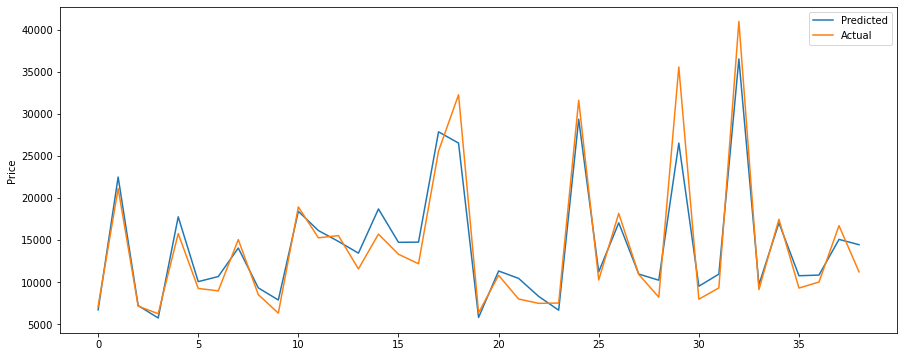

In [40]:
# now lets plot the predicted y value 
pylab.rcParams['figure.figsize'] = (15,6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')

plt.legend()
plt.show() #predicted and actual values looks to be decently close enough.

In [41]:
# lets see the r^2 value on the test data
r_square = ridge_model.score(x_test, y_test) #92% score on test data is really good
r_square

0.9215322460027142

In [42]:
# lets calculate root mean square error [mse]
ridge_model_mse = mean_squared_error(y_predict, y_test)
math.sqrt(ridge_model_mse) 
#this value is similar to lasso model mse
# the predicted house prices are -ve or +ve away from actual values of price 2359$ [variance of predic]

2359.90179360815

if you try to increase the penalty i.e alpha value for ridge model from 0.05 to 0.5..observe the values..they will change.
continuous and blind increase of alpha value will hurt our model.
there is a different process to increase the alpha value. dont do it blindly.
    
one way you can follow is, try different models with different alpha value and use
the model that gives best results for your test data.
this is known as hyper parameter tuning.

In [43]:
# SVM = Support vector machine is mainly used for classification problems.
# lets implement SVM [ Support vector regression ]
import pandas as pd